In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

def get_estrato(estrato,promedio):
    if estrato=='Estrato 1':
        promedio[0]+=1
    elif estrato=='Estrato 2':
        promedio[1]+=1
    elif estrato=='Estrato 3':
        promedio[2]+=1
    else:
        promedio[3]+=1
        
    return promedio

def get_range(dfA):
    promedioA=[0,0,0,0]
    promedioB=[0,0,0,0]
    promedioC=[0,0,0,0]
    promedioD=[0,0,0,0]

    for i in range(len(dfA)):
        puntaje=dfA.loc[i,'puntaje']
        if puntaje>=100 and puntaje<=200:
            estrato=dfA.loc[i,'estrato']
            promedioA= get_estrato(estrato,promedioA)
        elif puntaje>=201 and puntaje<=300:
            estrato= dfA.loc[i,'estrato']
            promedioB= get_estrato(estrato,promedioB)
        elif puntaje>=301 and puntaje<=400:
            estrato=dfA.loc[i,'estrato']
            promedioC= get_estrato(estrato,promedioC)
        elif puntaje>=401 and puntaje<=500:
            estrato=dfA.loc[i,'estrato']
            promedioD= get_estrato(estrato,promedioD)
                
    
    return promedioA,promedioB,promedioC,promedioD

def get_pastel(rango):
    dicc={
        'estrato':estrato,
        'total':tot[rango]
    }
    
    df_pastel = pd.DataFrame(dicc, columns = ['estrato', 'total'])
    return df_pastel

In [3]:
connection = create_db_connection("testdb_mysql", "user", 'password','ICFES')



res=read_query(connection, "select * from Datos")
df= pd.DataFrame(res,columns=['id','departamento','estrato','internet','puntaje'])

df.head()


df_median=df.groupby(['departamento','estrato'])[['puntaje']].mean()
df_median.reset_index(inplace=True)


df_internet=df.groupby(['internet','estrato'])[['puntaje']].mean()
df_internet.reset_index(inplace=True)
df_internet=df_internet.drop(df_internet.index[[6,13]])


connection.close()

MySQL Database connection successful


In [4]:
tot = get_range(df)
estrato=['Estrato 1','Estrato 2','Estrato 3','Estrato 4']


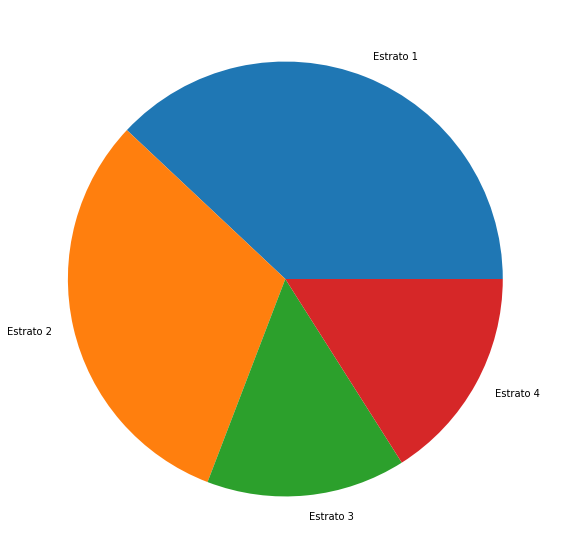

In [5]:
plt.subplots(figsize=(20, 10))
y = np.array(tot[0])
plt.pie(y,labels = estrato)
plt.show() 

In [17]:
df_aux=df_median.loc[df_median['estrato'] == 'Estrato 1']
corte=[elem[:3] for elem in df_aux['departamento']]
plt.subplots(figsize=(20, 10))
ax=plt.scatter(corte, df_aux['puntaje'].tolist())

plt.show()

SyntaxError: invalid syntax (<ipython-input-17-9913ccfe58e6>, line 5)

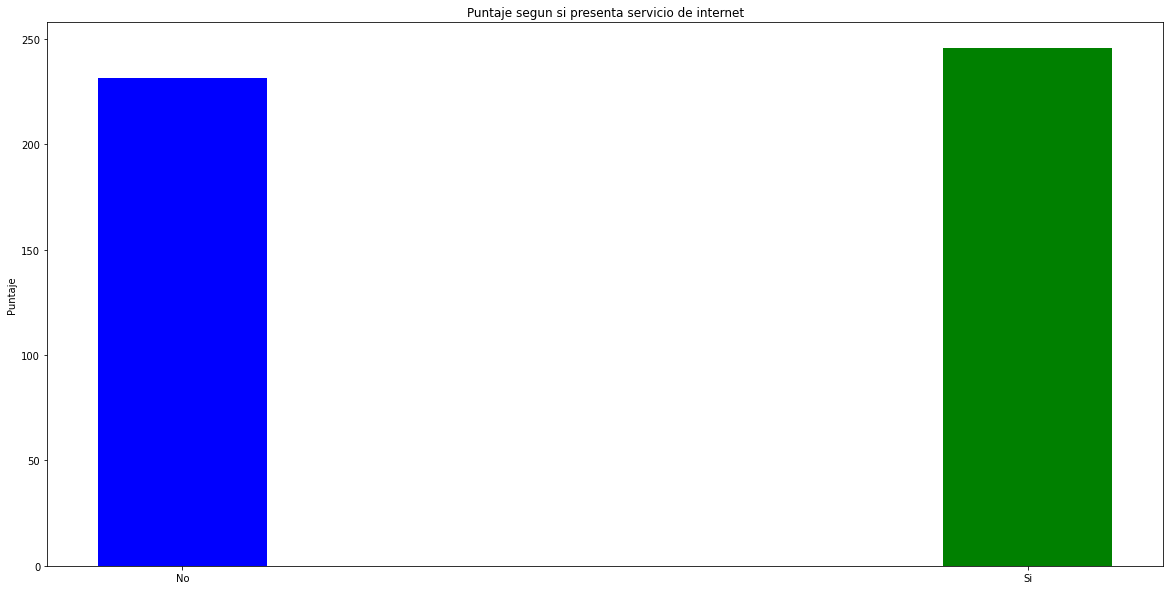

In [12]:
plt.subplots(figsize=(20, 10))
ax = plt.subplot()

no=df_internet.iloc[0]['puntaje']
si= df_internet.iloc[6]['puntaje']

ax.bar('No', no, width=0.2, color='b', align='center')
ax.bar('Si', si, width=0.2, color='g', align='center')

ax.set_ylabel('Puntaje')
ax.set_title('Puntaje segun si presenta servicio de internet')


plt.show()
